Data loaded successfully.
Shape of the dataset: (506, 14)
Missing values filled with mean.

Input variables (X):
 ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
Target variable (y): medv


Training set size: 404 samples
Testing set size: 102 samples
Model training completed.

--- Model Evaluation ---
Root Mean Squared Error (RMSE): 4.94
R-squared (R2) Score: 0.67
------------------------

Interpretation:
The RMSE of 4.94 means that, on average, the model's predictions are about $4,940.12 away from the actual median home value.
An R-squared value of 0.67 indicates that approximately 67% of the variability in the median home value can be explained by the input features in our model.


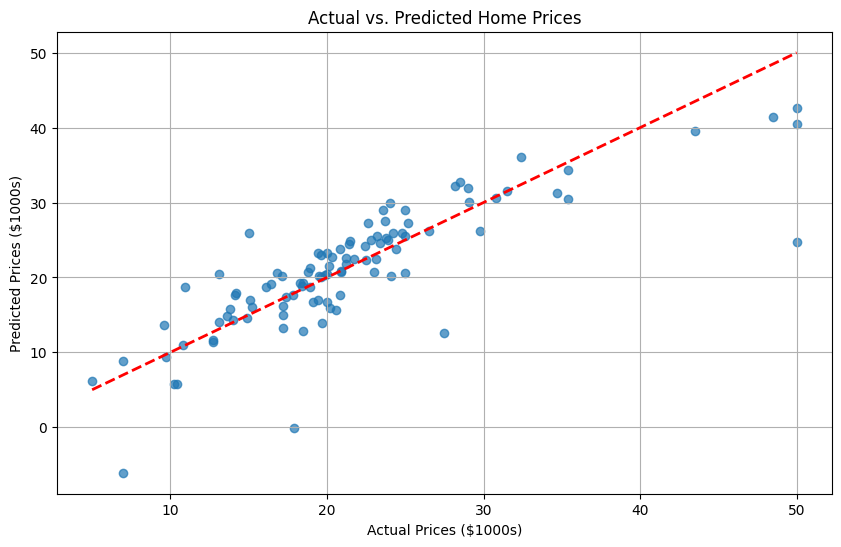

In [1]:
#Step 1: Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

#Step 2: Loading the dataset
try:
    df= pd.read_csv('BostonHousing.csv')
    print("Data loaded successfully.")
    print("Shape of the dataset:", df.shape)
except FileNotFoundError:
    print("File not found. Please ensure 'BostonHousing.csv' is in the current directory.")
    exit()

#Step 3: Exploring the dataset and handling the missing values
if df.isnull().sum().any():
    print("Warning: The dataset contains missing values and filled with the mean.")
    df.fillna(df.mean(), inplace=True)  
    print("Missing values filled with mean.")
else:
    print("No missing values found in the dataset.")


#Step 4: Defining the input and target variables.
#the input variables are all columns (X-axis) except 'medv' and the target variable is 'medv'(y-axis)
X=df.drop('medv', axis=1)
y=df['medv']
print("\nInput variables (X):\n", X.columns.tolist())
print("Target variable (y): medv\n")


# Step 5: Split the Data into Training and Testing Sets
# We split the data to train the model on one subset and test it on another, unseen subset.
# This helps us evaluate the model's performance on new data.
# test_size=0.2 means 20% of the data will be used for testing.
# random_state ensures we get the same split every time we run the code, for reproducibility


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


#Model Training and Evaluation

# Step 6: Initialize and Train the Linear Regression Model
# Create an instance of the LinearRegression model.

model= LinearRegression()

# Train the model using the training data. The .fit() method finds the optimal
# coefficients (slope and intercept) for the linear equation.
model.fit(X_train, y_train)
print("Model training completed.")

# Step 7: Make Predictions on the Test Set
# Use the trained model to make predictions on the test data (X_test).
y_pred = model.predict(X_test)

#Step 8: Evaluating the model's performance
# We compare the model's predictions (y_pred) with the actual values (y_test).
# Root Mean Squared Error (RMSE)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))

#R-squared (R²) Score 
r2=r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print("------------------------")

# Interpretation of the results
print("\nInterpretation:")
print(f"The RMSE of {rmse:.2f} means that, on average, the model's predictions are about ${rmse*1000:,.2f} away from the actual median home value.")
print(f"An R-squared value of {r2:.2f} indicates that approximately {r2*100:.0f}% of the variability in the median home value can be explained by the input features in our model.")

# Step 9: Visualizing the Results   
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.title("Actual vs. Predicted Home Prices")
plt.grid(True)
plt.show()
